EXTRACT

In [1]:
# Extract happiness data
import pandas as pd
file = '../ETL-Project/2019.csv'
happiness_df = pd.read_csv(file)
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


TRANSFORM

In [2]:
# CLEAN HAPPINESS_DF

# Remove extra columns
happiness_df = happiness_df.drop(columns=['GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

# Rename country column
happiness_df = happiness_df.rename(columns={"Country or region": "Country"})

happiness_df['Score'] = happiness_df['Score'].astype(float)
happiness_df.head()

,Overall rank,Country,Score
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488


In [3]:
#Export happiness DF to csv
happiness_df.to_csv(r'/Users/marinaduarte/Documents/ETL-Project/happiness_df.csv',index=False)

In [4]:
# Extract Facebook data
import requests
url = "https://worldpopulationreview.com/country-rankings/facebook-users-by-country"
response = requests.get(url)
tables = pd.read_html(url)

In [5]:
# CLEAN FACEBOOK DATA

facebook_df = tables[0]
facebook_df['Facebook Users'] = facebook_df['Facebook Users (2019)'] / facebook_df['Population 2020']
facebook_df = facebook_df.dropna()
facebook_df = facebook_df.rename(columns={"Facebook Users": "Facebook Users (%)"})

facebook_df.head()

,Country,Facebook Users (2019),Population 2020,Facebook Users (%)
0,India,251000000.0,1380004385,0.181883
1,United States,240000000.0,331002651,0.725070
2,Brazil,139000000.0,212559417,0.653935
3,Indonesia,136960000.0,273523615,0.500725
4,Mexico,78000000.0,128932753,0.604967


In [6]:
#Transform facebook data
#formatting column we want to use to float
facebook_df['Facebook Users (%)'] = facebook_df['Facebook Users (%)'].astype(float)
facebook_df['Facebook Users (%)'] = (facebook_df['Facebook Users (%)']) * 100
facebook_df.head()

,Country,Facebook Users (2019),Population 2020,Facebook Users (%)
0,India,251000000.0,1380004385,18.188348
1,United States,240000000.0,331002651,72.506972
2,Brazil,139000000.0,212559417,65.393480
3,Indonesia,136960000.0,273523615,50.072459
4,Mexico,78000000.0,128932753,60.496653


In [7]:
#Dropping columns we don't need
facebook_df = facebook_df.drop(columns=['Facebook Users (2019)', 'Population 2020'])
facebook_df.head()

,Country,Facebook Users (%)
0,India,18.188348
1,United States,72.506972
2,Brazil,65.393480
3,Indonesia,50.072459
4,Mexico,60.496653


In [8]:
#Export facebook DF to csv
facebook_df.to_csv(r'/Users/marinaduarte/Documents/ETL-Project/facebook_df.csv',index=False)

In [9]:
#Extract smartphone usage data
cell_url = 'https://www.bankmycell.com/blog/how-many-phones-are-in-the-world'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(cell_url, headers=header)

cell_df2 = pd.read_html(r.text)

In [10]:
cell_df = cell_df2[1]
cell_df.head()

,RANK,COUNTRY/MARKET,TOTAL POPULATION,SMARTPHONE USERS,SMARTPHONE PENETRATION
0,1,China,1.42B,851M,59.9%
1,2,India,137B,346M,25.3%
2,3,United States,329M,260M,79.1%
3,4,Brazil,212M,96.9M,45.6%
4,5,Russian Federation,144M,95.4M,66.3%


In [11]:
#Transform smartphone usage data

cell_df['SMARTPHONE PENETRATION'] = cell_df['SMARTPHONE PENETRATION'].map(lambda x: x.rstrip('%'))
cell_df.head()

,RANK,COUNTRY/MARKET,TOTAL POPULATION,SMARTPHONE USERS,SMARTPHONE PENETRATION
0,1,China,1.42B,851M,59.9
1,2,India,137B,346M,25.3
2,3,United States,329M,260M,79.1
3,4,Brazil,212M,96.9M,45.6
4,5,Russian Federation,144M,95.4M,66.3


In [12]:
#drop columns we don't need
cell_df = cell_df.drop(columns=['RANK', 'TOTAL POPULATION', 'SMARTPHONE USERS'])
cell_df.head()

,COUNTRY/MARKET,SMARTPHONE PENETRATION
0,China,59.9
1,India,25.3
2,United States,79.1
3,Brazil,45.6
4,Russian Federation,66.3


In [13]:
#Formatting column we want to use to float
cell_df['SMARTPHONE PENETRATION'] = cell_df['SMARTPHONE PENETRATION'].astype(float)
cell_df.head()

,COUNTRY/MARKET,SMARTPHONE PENETRATION
0,China,59.9
1,India,25.3
2,United States,79.1
3,Brazil,45.6
4,Russian Federation,66.3


In [14]:
#renaming columns
cell_df = cell_df.rename(columns={"COUNTRY/MARKET": "Country"})
cell_df = cell_df.rename(columns={"SMARTPHONE PENETRATION": "Smartphone Usage (%)"})
cell_df.head()

,Country,Smartphone Usage (%)
0,China,59.9
1,India,25.3
2,United States,79.1
3,Brazil,45.6
4,Russian Federation,66.3


In [15]:
#Export smartphone DF to csv
cell_df.to_csv(r'/Users/marinaduarte/Documents/ETL-Project/cell_df.csv',index=False)

In [16]:
#Merging dataframes to have all the information in one final DF
almost_final_df = happiness_df.merge(facebook_df, how='inner', on='Country')
almost_final_df.head()

,Overall rank,Country,Score,Facebook Users (%)
0,1,Finland,7.769,48.730129
1,2,Denmark,7.600,63.878988
2,3,Norway,7.554,62.716267
3,4,Iceland,7.494,73.261576
4,5,Netherlands,7.488,57.193307


In [17]:
final_df = almost_final_df.merge(cell_df, how='inner', on='Country')
final_df.head()

,Overall rank,Country,Score,Facebook Users (%),Smartphone Usage (%)
0,5,Netherlands,7.488,57.193307,71.2
1,6,Switzerland,7.480,42.751723,72.9
2,7,Sweden,7.343,62.380777,73.7
3,9,Canada,7.278,60.939818,73.8
4,11,Australia,7.228,58.823797,69.3


In [18]:
#Renaming final columns
final_df = final_df.rename(columns={'Overall rank':'Overall Rank Happiness', 'Score':'Score Happiness'})
final_df
#Countries that are at the top of the happiness ranking have a high percentage of facebook users and smartphone usage
#Countries at the bottom of the happiness ranking have a low percentage of facebook users and smartphone usage, with a few exceptions
#We can say that there is a small positive correlation between happiness and social media usage.

,Overall Rank Happiness,Country,Score Happiness,Facebook Users (%),Smartphone Usage (%)
0,5,Netherlands,7.488,57.193307,71.2
1,6,Switzerland,7.480,42.751723,72.9
2,7,Sweden,7.343,62.380777,73.7
3,9,Canada,7.278,60.939818,73.8
4,11,Australia,7.228,58.823797,69.3
5,15,United Kingdom,7.054,64.814532,82.9
6,17,Germany,6.985,36.999930,79.9
7,18,Belgium,6.923,56.084654,69.6
8,19,United States,6.892,72.506972,79.1
9,20,Czech Republic,6.852,42.954600,67.6


In [19]:
#Export final DF to csv
final_df.to_csv(r'/Users/marinaduarte/Documents/ETL-Project/final_df.csv',index=False)

<Figure size 7200x720 with 0 Axes>

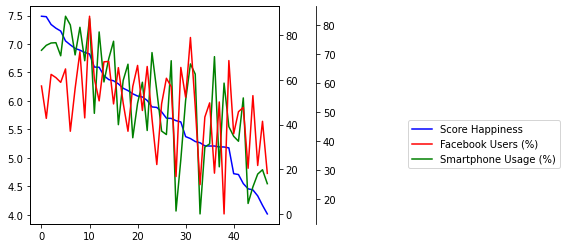

<Figure size 7200x720 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

final_df['Score Happiness'].plot(ax=ax, style='b-')
final_df['Facebook Users (%)'].plot(ax=ax, style='r-', secondary_y=True)
final_df['Smartphone Usage (%)'].plot(ax=ax3, style='g-')
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Score Happiness', 'Facebook Users (%)', 'Smartphone Usage (%)'], bbox_to_anchor=(1.5, 0.5))
plt.figure(figsize=(100,10))